# 2. Simulating Frailty Distribution

## Why Frailty Matters

Frailty isn’t a disease, but a state of increased vulnerability to poor health outcomes. It's not a simple 'yes' or 'no' label; it's a **continuous spectrum**. A person can range from being very fit to mildly frail to severely frail.

Understanding the distribution of frailty is critical for planning diagnostic services, especially those delivered in the community or at home. Patients with higher frailty are less likely to travel to a hospital, meaning services like mobile CT, portable ultrasound, and home-based diagnostics become essential. The 'long tail' of the frailty distribution represents these high-need, high-risk patients.

## Choosing the Right PDF: The Beta Distribution

Frailty is often measured using an index, such as the Electronic Frailty Index (eFI), which typically produces a score between 0 and 1. The **Beta distribution** is an ideal statistical tool for modeling variables that are constrained to a fixed interval.

By adjusting its two parameters, `a` and `b`, we can model the expected right-skewed nature of frailty:
- Most of the population is fit or has mild frailty (a peak towards the left).
- A 'long tail' represents the smaller number of people with moderate to severe frailty.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style="whitegrid")

### Simulating a Population's Frailty Scores

Let's simulate frailty scores for a hypothetical population of 50,000 people. We'll set the parameters `a=2` and `b=8` to create the characteristic right-skew.

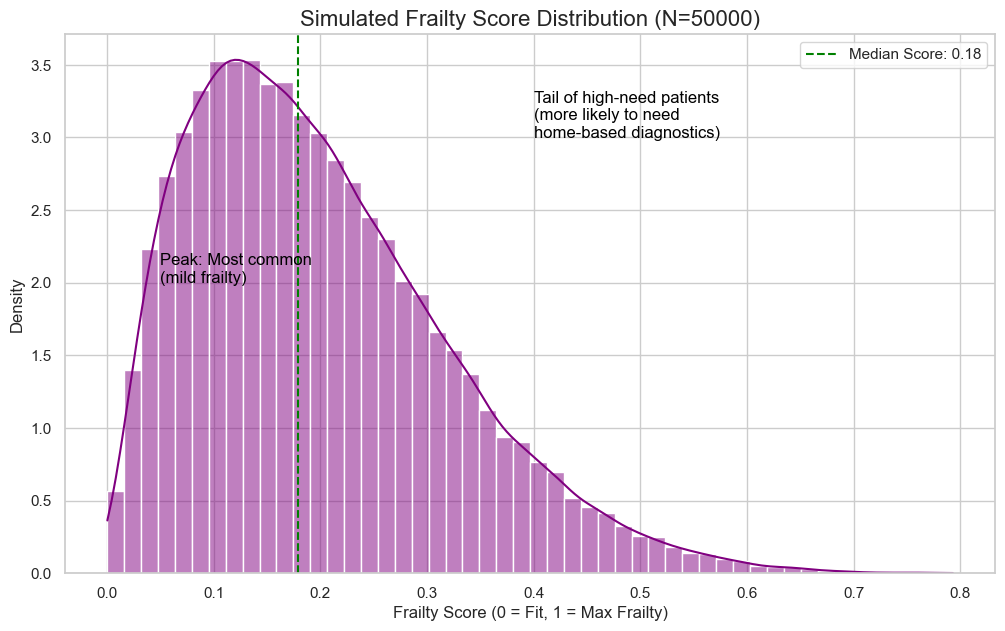

In [2]:
# Parameters for a Beta distribution to model frailty (right-skewed)
a, b = 2, 8
population_size = 50000

# Generate frailty scores between 0 and 1
frailty_scores = stats.beta.rvs(a, b, size=population_size, random_state=42)

# Plot the distribution
plt.figure(figsize=(12, 7))
sns.histplot(frailty_scores, bins=50, kde=True, stat="density", color="purple")

plt.title(f'Simulated Frailty Score Distribution (N={population_size})', fontsize=16)
plt.xlabel('Frailty Score (0 = Fit, 1 = Max Frailty)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Add lines for interpretation
plt.axvline(np.median(frailty_scores), color='green', linestyle='--', label=f'Median Score: {np.median(frailty_scores):.2f}')
plt.text(0.4, 3.0, 'Tail of high-need patients\n(more likely to need\nhome-based diagnostics)', horizontalalignment='left', color='black', fontsize=12)
plt.text(0.05, 2.0, 'Peak: Most common\n(mild frailty)', horizontalalignment='left', color='black', fontsize=12)
plt.legend()
plt.show()

### Using the PDF for Planning: Estimating Population Segments

Now for the powerful part. We can use this distribution to estimate how many people fall into clinically meaningful categories. We can define thresholds based on the frailty score (these are illustrative):

- **Fit**: Score < 0.12
- **Mild Frailty**: 0.12 <= Score < 0.24
- **Moderate Frailty**: 0.24 <= Score < 0.36
- **Severe Frailty**: Score >= 0.36

The 'area under the curve' for each segment gives us the proportion of the population in that group. In statistical terms, this is the **Cumulative Distribution Function (CDF)**.

Estimated Population by Frailty Category:
- Fit: 14,755 people (29.5%)
- Mild: 18,993 people (38.0%)
- Moderate: 10,789 people (21.6%)
- Severe: 5,460 people (10.9%)

This model predicts approximately 5,460 people have severe frailty.


/var/folders/sy/gz5gl6d91cbfwd2z85r62rbc0000gn/T/ipykernel_52948/3708896461.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette=colors)


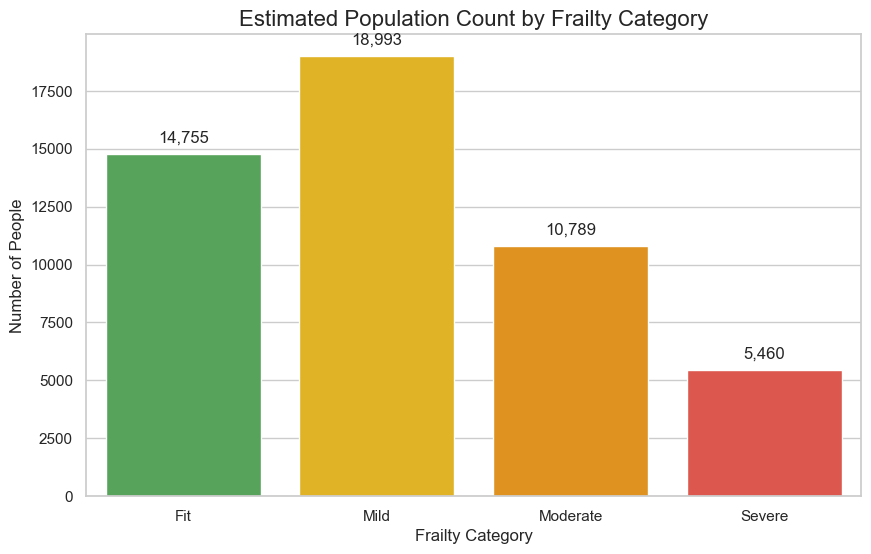

In [3]:
# Define frailty thresholds
thresholds = {
    'Fit': (0, 0.12),
    'Mild': (0.12, 0.24),
    'Moderate': (0.24, 0.36),
    'Severe': (0.36, 1.0)
}

# Calculate the number of people in each category
category_counts = {}
for category, (lower_bound, upper_bound) in thresholds.items():
    # Using the CDF: cdf(upper) - cdf(lower) gives the area between the two points
    proportion = stats.beta.cdf(upper_bound, a, b) - stats.beta.cdf(lower_bound, a, b)
    count = int(proportion * population_size)
    category_counts[category] = count

print("Estimated Population by Frailty Category:")
for category, count in category_counts.items():
    print(f"- {category}: {count:,} people ({count/population_size:.1%})")

# The group we are particularly interested in for mobile diagnostics
severe_frailty_count = category_counts['Severe']
print(f"\nThis model predicts approximately {severe_frailty_count:,} people have severe frailty.")

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
colors = ['#4CAF50', '#FFC107', '#FF9800', '#F44336']
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()), palette=colors)
plt.title('Estimated Population Count by Frailty Category', fontsize=16)
plt.xlabel('Frailty Category', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
for index, value in enumerate(category_counts.values()):
    plt.text(index, value + 500, f'{value:,}', ha='center')
plt.show()

## Conclusion

By modeling frailty with a PDF, we've moved from a vague concept to a quantifiable planning tool. We can now estimate the size of the population segment that is most likely to need specialized, community-based diagnostic services.

In the next notebook, we'll expand this approach to model **multimorbidity**—the presence of multiple Long-Term Conditions (LTCs).